In [31]:
import oracles
import methods
import plot_trajectory_2d
import numpy as np
import random
import scipy as sp
import matplotlib.pyplot as plt
from scipy.sparse import diags
import pandas as pd
%matplotlib inline

In [110]:
np.random.seed(42)

# <center> Домашнее задание №3. Градиентный спуск </center>

# 2.2 Траектория градиентного спуска на квадратичной функции.
Для эксперимента возьмем три исходные двумерные квадратичные функции. Задающие их матрицы имеют вид:
$ A_{good} = \begin{bmatrix}
1.1& 0\\
0& 1
\end{bmatrix}$, $ A_{bad} = \begin{bmatrix}
2.2& 0\\
0& 1
\end{bmatrix}$, $ A_{ugly} = \begin{bmatrix}
14& 0\\
0& 1
\end{bmatrix}$


A = 
 [[1.1 0. ]
 [0.  1. ]] 
b =  [0. 0.] 
x_0 =  [-2.50919762  9.01428613]

 Число обусловленности =  1.1


C:\Users\User\Desktop\MADE\MADE2020Spring\MADESpring2020_MOML\Practice\homework_3\plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


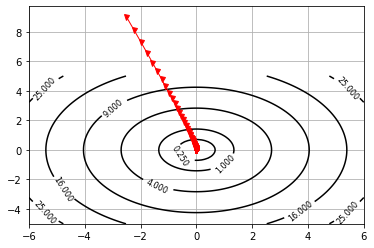


 Метод оптимизации :       Constant

 Решение :  [-7.63915974e-06  9.27608817e-05]

 Количество итераций     110


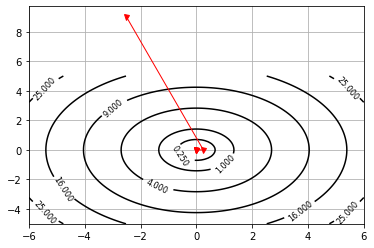


 Метод оптимизации :       Armijo

 Решение :  [2.50919762e-05 0.00000000e+00]

 Количество итераций     6


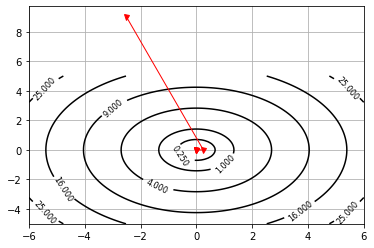


 Метод оптимизации :       Wolfe

 Решение :  [2.50919762e-05 0.00000000e+00]

 Количество итераций     6

A = 
 [[2.2 0. ]
 [0.  1. ]] 
b =  [0. 0.] 
x_0 =  [4.63987884 1.97316968]

 Число обусловленности =  2.2


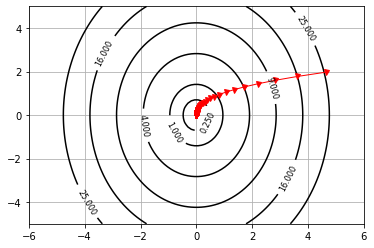


 Метод оптимизации :       Constant

 Решение :  [3.33733108e-10 9.86189380e-05]

 Количество итераций     95


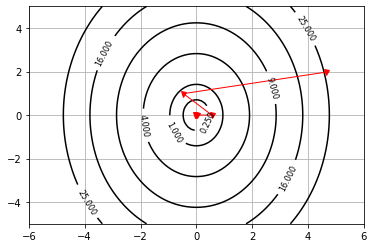


 Метод оптимизации :       Armijo

 Решение :  [-5.5678546e-06  0.0000000e+00]

 Количество итераций     8


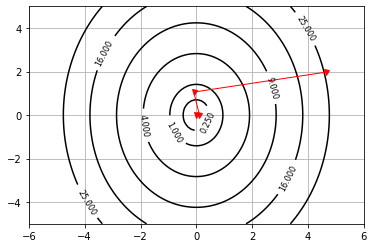


 Метод оптимизации :       Wolfe

 Решение :  [-1.38777878e-17  0.00000000e+00]

 Количество итераций     4

A = 
 [[14  0]
 [ 0  1]] 
b =  [0. 0.] 
x_0 =  [-6.87962719 -6.88010959]

 Число обусловленности =  14.0


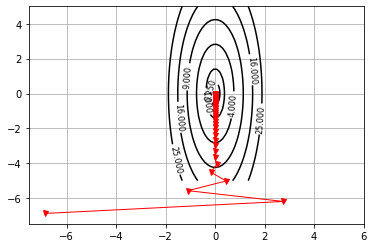


 Метод оптимизации :       Constant

 Решение :  [ 1.02958965e-33 -8.87582352e-04]

 Количество итераций     86


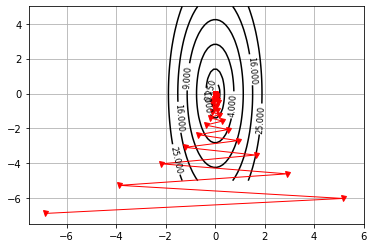


 Метод оптимизации :       Armijo

 Решение :  [-5.35649569e-05 -4.05925298e-04]

 Количество итераций     67


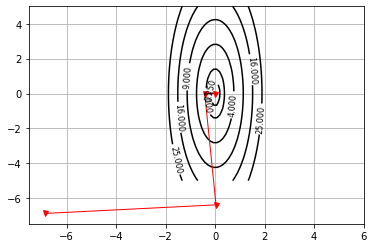


 Метод оптимизации :       Wolfe

 Решение :  [1.66533454e-16 0.00000000e+00]

 Количество итераций     4


In [111]:
A_good = np.array([[1.1, 0], [0,1]])
A_bad = np.array([[2.2, 0], [0,1]])
A_ugly = np.array([[14, 0], [0,1]])
b = np.zeros(2)
results_1=[]
for A in [A_good,A_bad,A_ugly]:
    oracle = oracles.QuadraticOracle(A, b)
    x_0 = np.random.uniform(-10, 10, size=2)
    print("\nA = \n", A,"\nb = ", b , "\nx_0 = ", x_0)
    print("\n Число обусловленности = ", np.linalg.cond(A))  
    optParamDict = {'method': None,
                    'c' : 0.1}
    for method in ['Constant', 'Armijo', 'Wolfe']:
        optParamDict['method'] = method
        params = methods.get_line_search_tool(optParamDict)
        x_star, history = methods.GradientDescent(oracle,x_0,line_search_options=params).run()   
        plot_trajectory_2d.plot_levels(oracle.func)
        plot_trajectory_2d.plot_trajectory(oracle.func, history=history['x'])
        plt.show()
        print("\n Метод оптимизации :      ", optParamDict['method'])
        print("\n Решение : ", x_star)
        print("\n Количество итераций    ", len(history['x'])) 
        results_1.append({'Число обусловленности':np.linalg.cond(A), 'Метод оптимизации':method, 'Решение':x_star,'Количество итераций':(len(history['x']))})

In [112]:
results_1=pd.DataFrame(results_1)
results_1

,Число обусловленности,Метод оптимизации,Решение,Количество итераций
0,1.1,Constant,"[-7.639159744263318e-06, 9.276088171425391e-05]",110
1,1.1,Armijo,"[2.5091976230527603e-05, 0.0]",6
2,1.1,Wolfe,"[2.5091976230527603e-05, 0.0]",6
3,2.2,Constant,"[3.337331077281449e-10, 9.861893803459775e-05]",95
4,2.2,Armijo,"[-5.5678546034737585e-06, 0.0]",8
5,2.2,Wolfe,"[-1.3877787807814457e-17, 0.0]",4
6,14.0,Constant,"[1.0295896477792209e-33, -0.0008875823520816371]",86
7,14.0,Armijo,"[-5.3564956908701234e-05, -0.00040592529769846...",67
8,14.0,Wolfe,"[1.6653345369377348e-16, 0.0]",4


### Результаты и выводы 
Можно заметить, что для $\forall \kappa$ количество итераций, необходимое константному алгоритму максимально по сравнению с другими методами. Данный метод не способен "адаптироваться" под выбор начальной точки и ему очень сложно не "промахнуться" близ целевой точки.
Методам Армихо и Вульфа требуется меньшее количество итераций. Вцелом, методу Вульфа требуется небольше итераций, чем методу Армихо. 
Можно заметить, что с ростом значения $\kappa$ наблюдается особенность поведения градиентных методов, заключающаяся в большом количестве "маленьких шагов". 

# 2.3 Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Построим график зависимости количества итераций $N(n, \kappa)$ при размерности пространства $n\in [10, 10000]$ от значения числа обусловленности целевой функции $\kappa \in [1,1000]$. Изобразим на графике кривые $t_{ni}$ из семейства кривых $T_n$ и усредненную кривую для каждого из семеств $T_n$. Был использован метод Вульфа.


Text(0.5, 0, 'Число обусловленности целевой функции $\\kappa$')

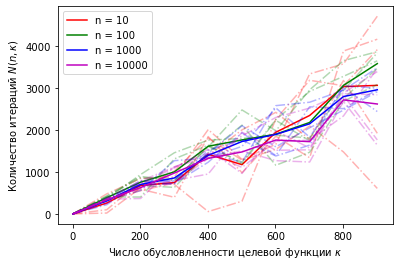

In [109]:
ns = [10, 100, 1000, 10000]
colors = ['r', 'g', 'b', 'm']
kappas = list(range(1, 1000, 100))
number_of_samples = 5
T = {}
for n, color in zip(ns, colors):
    T[n] = [[] for _ in range(number_of_samples)]
    for i in range(number_of_samples):
        for kappa in kappas:
            np.random.seed(i)
            diag = np.random.uniform(low=1, high=kappa, size=n)
            diag[0], diag[-1] = 1, kappa
            A = diags(diag)
            b = np.random.uniform(low=1, high=kappa, size=n)
            oracle = oracles.QuadraticOracle(A, b)
            __, history = methods.GradientDescent(oracle,
                                                      np.zeros(n),
                                                      line_search_options=methods.get_line_search_tool(
                                                          {'method': 'Wolfe'})).run(max_iter=-1)
            T[n][i].append(len(history['func']))
        plt.plot(kappas, T[n][i], color=color, alpha=0.3, linestyle = '-.')
    plt.plot(kappas, np.mean(T[n], axis=0), color=color, label='n = {}'.format(n))
plt.legend()
plt.ylabel('Количество итераций $N(n, \kappa)$')
plt.xlabel('Число обусловленности целевой функции $\kappa$')

### Результаты и выводы 
1. В целом, характер поведения усредненных кривых схож для различных значений $n$, что может свидетельствовать либо об отсутствии зависимости между N и n, либо о наличии крайне слабой зависимости, далекой от линейной. 
2. Зависимость количества итераций N от число обусловленности целевой функции $\kappa$ наблюдается. Можно заметить, что с ростом значения $\kappa$ растет и количество итераций $N$ для $\forall n$, зависимость похожа на линейную. Указанные выводы согласуются с теорией.

Можем подвести итог, что для быстрой работы метода хотелось бы иметь малое значение числа обусловленности и хорошие начальные условия, чтобы избегать "зигзагов" и "маленьких" верных шагов в траектории. Многовато хотим... Зато знаем, когда лучше не использовать подобные методы.